In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv(r"C:\Users\Cj Naylor\Downloads\archive (2)\IMDB Dataset.csv")

print("Dataset Head")
print(data.head())
print("\n\n Data Info")
print(data.info())
print("\n\n Null Values")
print(data.isnull().sum())

#Convert reviews to lowercase
data['review'] = data['review'].str.lower()

#Convert sentiment to numerical -- 1 for positive, 0 for negative
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})
print(data.head())



Dataset Head
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


 Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


 Null Values
review       0
sentiment    0
dtype: int64
                                              review  sentiment
0  one of the other reviewers has mentioned that ...          1
1  a wonderful little production. <br /><br />the...          1
2  i thought this was a wonderful w

In [5]:
from sklearn.model_selection import train_test_split

X = data['review']  
y = data['sentiment']  

# Split into training and testing sets (80% training, 20% testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the remaining 20% into validation and test sets 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_val) 
print("\n") 
print(y_val)
print("\n")
print(X_train)
print("\n")
print(y_train)
print("\n")
print(X_temp)
print("\n")
print(y_temp)
print("\n")
print(X)
print("\n")
print(y)

47374    hollywood has churned out yet another garbage ...
48216    a trooper is on the side of the road making su...
45929    if you like his show you might be a little dis...
48715    a squashy slapstick mess posing as a comedy. e...
18849    lucio fulci was famous for his italian splatte...
                               ...                        
49939    depending entirely on your own personal state ...
6420     unless you're twelve, this movie really isn't ...
48421    i can't tell you all how much i love this movi...
26037    the last hunt is one of the few westerns ever ...
31247    i am rarely moved to make these kind of commen...
Name: review, Length: 5000, dtype: object


47374    0
48216    0
45929    1
48715    0
18849    0
        ..
49939    0
6420     0
48421    1
26037    1
31247    0
Name: sentiment, Length: 5000, dtype: int64


39087    that's what i kept asking myself during the ma...
30893    i did not watch the entire movie. i could not ...
45278    a touching lo

In [7]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK datasets 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenize text into words
    words = text.split()
    
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(words)

# Apply preprocessing to the reviews column
data['review'] = data['review'].apply(preprocess_text)

print("Sample of processed reviews:")
print(data['review'].head())


[nltk_data] Downloading package stopwords to C:\Users\Cj
[nltk_data]     Naylor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Cj
[nltk_data]     Naylor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Cj
[nltk_data]     Naylor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Sample of processed reviews:
0    one reviewer mentioned watching 1 oz episode y...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake think zombie ...
4    petter matteis love time money visually stunni...
Name: review, dtype: object


C:\Users\Cj Naylor\AppData\Local\Temp\ipykernel_7052\3901640546.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='coolwarm')


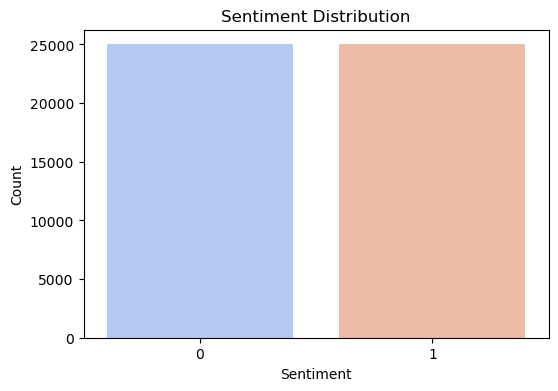

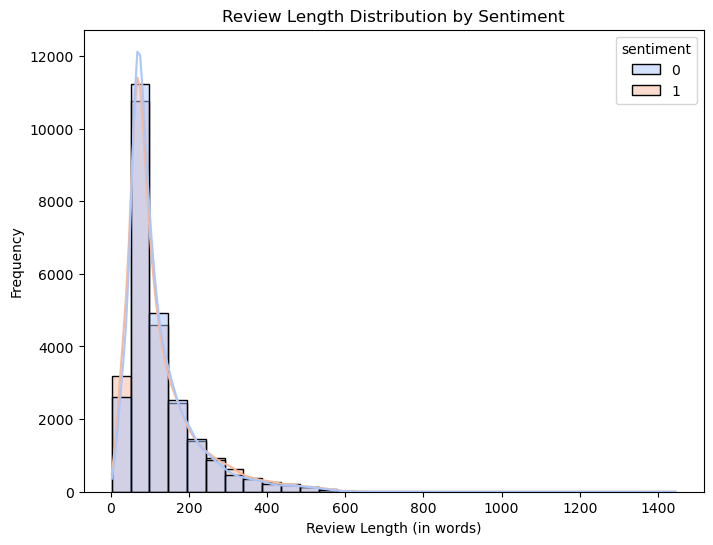

Total number of reviews: 50000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=data, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualize the length of the reviews
data['review_length'] = data['review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='review_length', hue='sentiment', kde=True, palette='coolwarm', bins=30)
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Review Length (in words)')
plt.ylabel('Frequency')
plt.show()


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  

# Fit and transform the training data to numerical features
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the validation and test data
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF feature shape:", X_train_tfidf.shape)


TF-IDF feature shape: (40000, 5000)


Validation Accuracy: 0.8532

Classification Report on Validation Data:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      2499
           1       0.86      0.85      0.85      2501

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



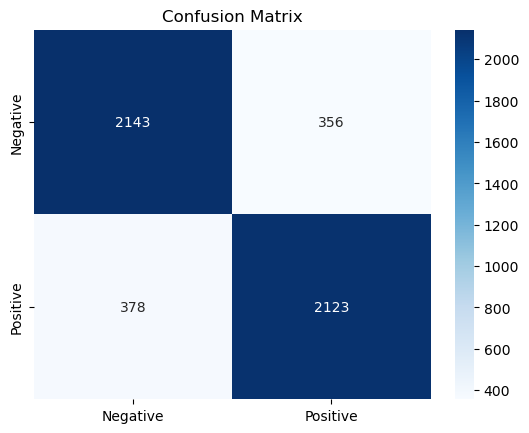

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train_tfidf, y_train)

# Predict on the validation set
y_val_pred = nb_model.predict(X_val_tfidf)

# Evaluate the model
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report on Validation Data:\n", classification_report(y_val, y_val_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.show()


Test Accuracy: 0.8502

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      2462
           1       0.85      0.85      0.85      2538

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



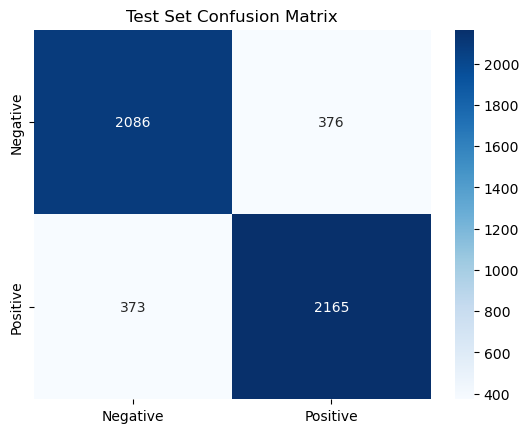

In [10]:
# Predict on the test set
y_test_pred = nb_model.predict(X_test_tfidf)

# Test set performance
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report on Test Data:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Test Set Confusion Matrix")
plt.show()
